

# What is a Predicting GDP and Inflation System?

The GDP and CPI inflation are two critical indicators that reflect the economic health and stability of the United States. GDP measures the total value of goods and services produced, representing overall economic growth, while the CPI inflation rate indicates the change in consumer prices over time, reflecting the cost of living and purchasing power. Historically, the US has experienced periods of robust GDP growth, punctuated by recessions that led to temporary declines, such as during the 2008 financial crisis and the recent COVID-19 pandemic. Despite these downturns, the US economy has demonstrated resilience with subsequent recoveries. In contrast, CPI inflation has varied, with the country experiencing high inflation rates in the 1970s and 1980s due to oil crises, followed by more stable rates in the decades that followed. However, recent years (2021–2022) have seen a resurgence in inflation, driven by supply chain disruptions, increased demand, and pandemic-related factors, reaching levels not seen in decades. This rising inflation poses challenges for economic growth, as it can erode purchasing power and increase production costs, prompting policymakers to consider tightening monetary policies to control inflation while sustaining economic growth. The interplay between GDP and inflation underscores the delicate balance needed to maintain economic stability and prosperity.

## 1. Package imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE





## 2. Dataset import

In [10]:
import pandas as pd

# Load the dataset
file_path = 'data/Inflation.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names to understand the structure of the file
sheet_names = data.keys()
sheet_names


dict_keys(['Intro', 'top', 'hcpi_m', 'hcpi_q', 'hcpi_a', 'ecpi_m', 'ecpi_q', 'ecpi_a', 'fcpi_m', 'fcpi_q', 'fcpi_a', 'ccpi_m', 'ccpi_q', 'ccpi_a', 'ppi_m', 'ppi_q', 'ppi_a', 'def_q', 'def_a', 'Aggregate'])

In [23]:

# Read all sheets into a dictionary of DataFrames
xls = pd.read_excel(file_path, sheet_name=None)

# Filter sheet names that end with '_m' and read them directly into a merged DataFrame
merged_df = pd.concat(
    (df for sheet_name, df in xls.items() if isinstance(sheet_name, str) and sheet_name.endswith('_m')),
    ignore_index=True
)

# Ensure all column names are strings
merged_df.columns = merged_df.columns.astype(str)

# Filter rows where the 'Country' column is 'United States' and drop columns starting with 'Unnamed'
cleaned_df = merged_df.loc[merged_df['Country'] == 'United States', merged_df.columns[~merged_df.columns.str.startswith('Unnamed')]]

cleaned_df


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,197001,197002,197003,197004,197005,...,202308,202309,202310,202311,202312,Data source,Note,202401,202402,Note.1
174,USA,111.0,United States,Index,Headline Consumer Price Index,15.948220,16.032610,16.116990,16.24356,16.28575,...,129.537500,129.8595,129.8097,129.5481,129.4194,OECDstat,NaN,NaN,NaN,NaN
378,USA,111.0,United States,Index,Energy Price Index,12.370930,12.370930,12.321640,12.56808,12.56808,...,145.064200,145.8902,141.3312,136.5381,132.7657,OECDstat,Energy price,NaN,NaN,NaN
535,USA,111.0,United States,Index,Food Price Index,16.300000,16.400000,16.400000,16.40000,16.50000,...,125.315200,125.3914,125.7610,125.0962,125.0122,OECDstat,Food and non-acoholic beverage,NaN,NaN,NaN
624,USA,111.0,United States,Index,Official Core Consumer Price Index,16.346980,16.429550,16.553390,16.63595,16.71851,...,128.011300,128.3061,128.5385,128.6318,128.7560,OECDstat,All Items Excluding Food and Energy,NaN,NaN,NaN
729,USA,111.0,United States,Index,Producer Price Index,20.229711,20.303745,20.340762,20.35927,20.35927,...,138.639376,NaN,NaN,NaN,NaN,IFS,"Producer Price Index, All Commodities",NaN,NaN,NaN


In [25]:
cleaned_df2 = cleaned_df.drop(columns=['Note','Data source','Indicator Type','Country Code','IMF Country Code','Country','Note.1' ], errors='ignore')
cleaned_df2.reset_index(drop=True, inplace=True)
df_t = cleaned_df2.transpose()
df_t.columns = df_t.iloc[0]
df = df_t[1:]
df.head()
# Check for missing values
print('\nMissing value count\n')
print(df.isnull().sum())


Missing value count

Series Name
Headline Consumer Price Index         2
Energy Price Index                    2
Food Price Index                      2
Official Core Consumer Price Index    2
Producer Price Index                  6
dtype: int64


In [27]:
df.fillna(df.mean(), inplace=True)  # Replace NaN with mean
print(df.isnull().sum())

Series Name
Headline Consumer Price Index         0
Energy Price Index                    0
Food Price Index                      0
Official Core Consumer Price Index    0
Producer Price Index                  0
dtype: int64


/var/folders/k_/ccb0tlcj5z579n5gj8v4kh5m0000gn/T/ipykernel_19024/1249347376.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)  # Replace NaN with mean
/var/folders/k_/ccb0tlcj5z579n5gj8v4kh5m0000gn/T/ipykernel_19024/1249347376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)  # Replace NaN with mean
/var/folders/k_/ccb0tlcj5z579n5gj8v4kh5m0000gn/T/ipykernel_19024/1249347376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [29]:
gdp_df = pd.read_csv('data/GDP.csv')

# Ensure 'DATE' column is correctly formatted and present
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'], errors='coerce')

# Remove rows with invalid dates, if any
gdp_df = gdp_df.dropna(subset=['DATE'])

# Set 'DATE' as index and resample to monthly with forward fill
gdp_df = gdp_df.set_index('DATE').resample('M').ffill().reset_index()

# Convert the 'DATE' column to YYYYMM format
gdp_df['DATE'] = gdp_df['DATE'].dt.strftime('%Y%m')


gdp_df.head()


/var/folders/k_/ccb0tlcj5z579n5gj8v4kh5m0000gn/T/ipykernel_19024/280022751.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gdp_df = gdp_df.set_index('DATE').resample('M').ffill().reset_index()


,DATE,GDP
0,194701,243.164
1,194702,243.164
2,194703,243.164
3,194704,245.968
4,194705,245.968


In [31]:
# Set the index of gdp_df to 'DATE'
gdp_df.set_index('DATE', inplace=True)

# Merge the GDP data with the existing DataFrame using 'DATE' as the key
merged_df = df.merge(gdp_df, left_index=True, right_index=True, how='left')

merged_df


,Headline Consumer Price Index,Energy Price Index,Food Price Index,Official Core Consumer Price Index,Producer Price Index,GDP
197001,15.948220,12.370930,16.300000,16.346980,20.229711,1051.200
197002,16.032610,12.370930,16.400000,16.429550,20.303745,1051.200
197003,16.116990,12.321640,16.400000,16.553390,20.340762,1051.200
197004,16.243560,12.568080,16.400000,16.635950,20.359270,1067.375
197005,16.285750,12.568080,16.500000,16.718510,20.359270,1067.375
...,...,...,...,...,...,...
202310,129.809700,141.331200,125.761000,128.538500,73.522344,28296.967
202311,129.548100,136.538100,125.096200,128.631800,73.522344,28296.967
202312,129.419400,132.765700,125.012200,128.756000,73.522344,28296.967
202401,66.442211,66.750706,64.451669,66.767013,73.522344,28624.069


In [33]:
# Check the structure of the dataset
print('\nStructure of the dataset\n')
print(merged_df.info())

# Check for missing values
print('\nMissing value count\n')
print(merged_df.isnull().sum())

# Summary statistics for numeric features
print('\nStats about the numerical features\n')
print(merged_df.describe())

# Unique values in categorical columns
print('\nUnique value count of Categorical columns\n')
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        print(f'{col} has {merged_df[col].nunique()} unique values')



Structure of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 197001 to 202402
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Headline Consumer Price Index       650 non-null    float64
 1   Energy Price Index                  650 non-null    float64
 2   Food Price Index                    650 non-null    float64
 3   Official Core Consumer Price Index  650 non-null    float64
 4   Producer Price Index                650 non-null    float64
 5   GDP                                 650 non-null    float64
dtypes: float64(6)
memory usage: 35.5+ KB
None

Missing value count

Headline Consumer Price Index         0
Energy Price Index                    0
Food Price Index                      0
Official Core Consumer Price Index    0
Producer Price Index                  0
GDP                                   0
dtype: int64

Stats about the numeric

In [35]:
df2= merged_df

#Rename the columns 
df2.rename(columns={
    'Headline Consumer Price Index': 'HCPI',
    'Energy Price Index': 'ECPI',
    'Food Price Index': 'FCPI',
    'Official Core Consumer Price Index': 'OCPI',
    'Producer Price Index': 'PPI'
}, inplace=True)



# Identify columns related to inflation
inflation_columns = [
    'HCPI', 
    'ECPI', 
    'FCPI', 
    'OCPI', 
    'PPI'
    
]
df2['GDP Trend'] =  df2['GDP'].diff().apply(lambda x: 1 if x > 0 else 0 )
print(df2.columns)

Index(['HCPI', 'ECPI', 'FCPI', 'OCPI', 'PPI', 'GDP', 'GDP Trend'], dtype='object')


## 3. Exploratory Data Analysis

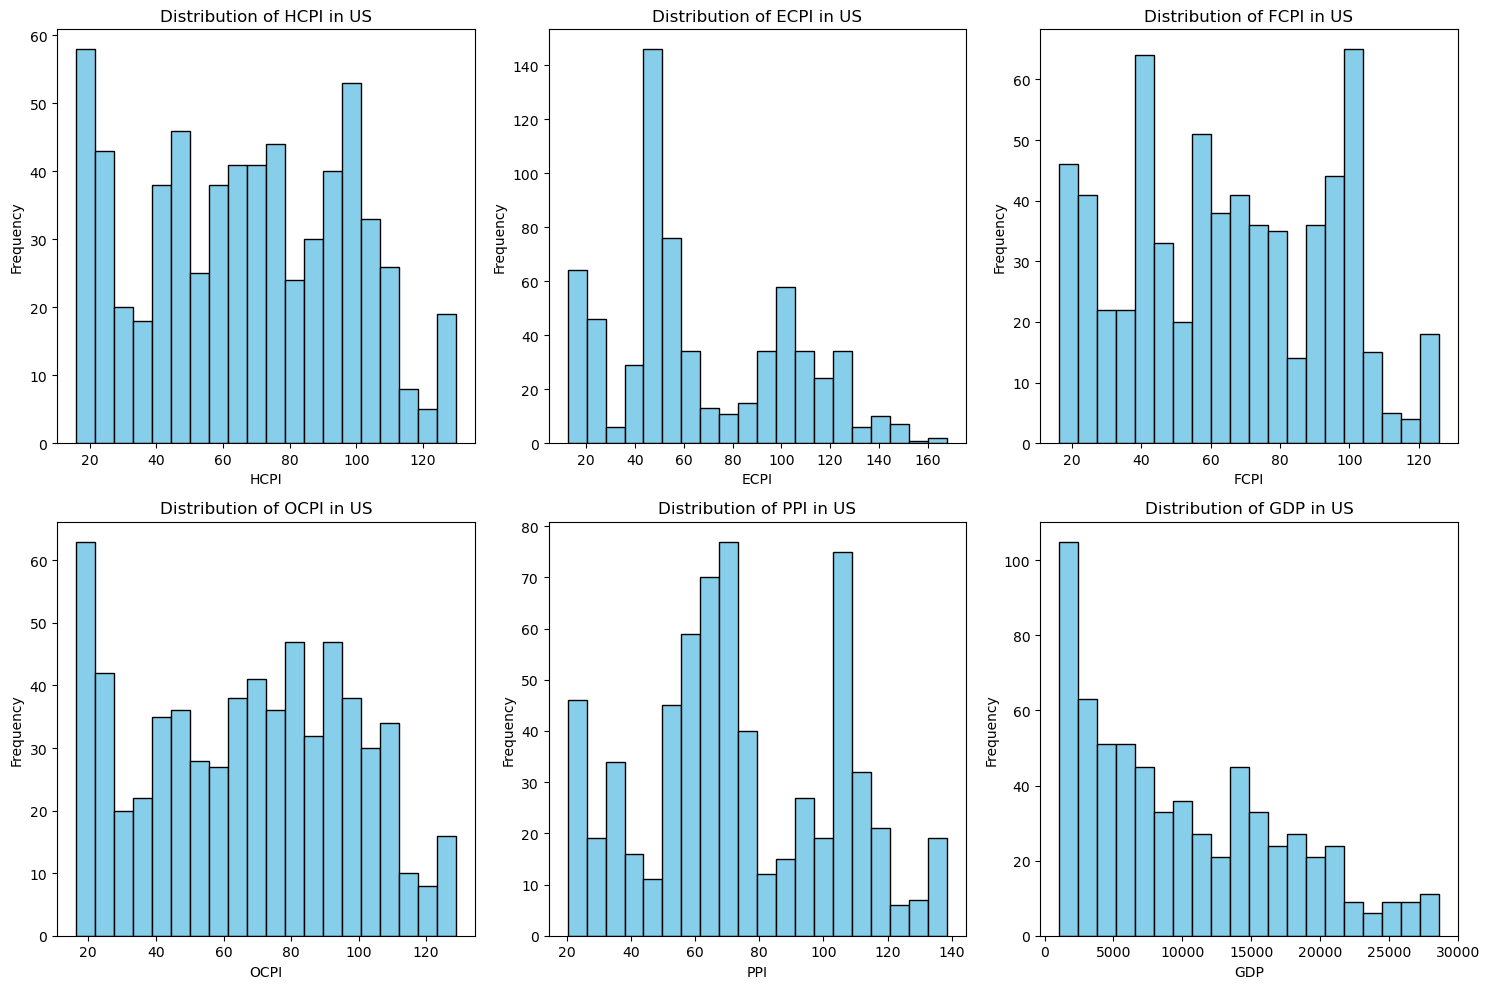

In [37]:

# Plotting histograms for numeric features

numeric_columns = df2.columns[:-1]

# Define the number of columns for the subplots
num_columns = 3  # Adjust this as needed
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calculate the required number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Adjust figure size as needed

# Ensure `axes` is treated as a flat array
if num_rows == 1:
    axes = axes.flatten() if num_columns > 1 else [axes]  # Handle single row with multiple columns or single subplot
else:
    axes = axes.flatten()  # Flatten if it's a 2D array


numeric_columns
for idx, col in enumerate(numeric_columns): 
    axes[idx].hist(df2[col], bins=20, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col} in US')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    fname = col.replace(" ","")

# Remove any unused subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

    


In [39]:
print(df2.columns)


Index(['HCPI', 'ECPI', 'FCPI', 'OCPI', 'PPI', 'GDP', 'GDP Trend'], dtype='object')


In [41]:
# Ensure `numeric_columns` are defined correctly

numeric_columns = ['HCPI', 'ECPI', 'FCPI', 'OCPI', 'PPI', 'GDP']  # Replace with your actual columns


df2[numeric_columns] = df2[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Check if columns are numeric
print(df2.dtypes)  # This will show the data types of all columns

HCPI         float64
ECPI         float64
FCPI         float64
OCPI         float64
PPI          float64
GDP          float64
GDP Trend      int64
dtype: object


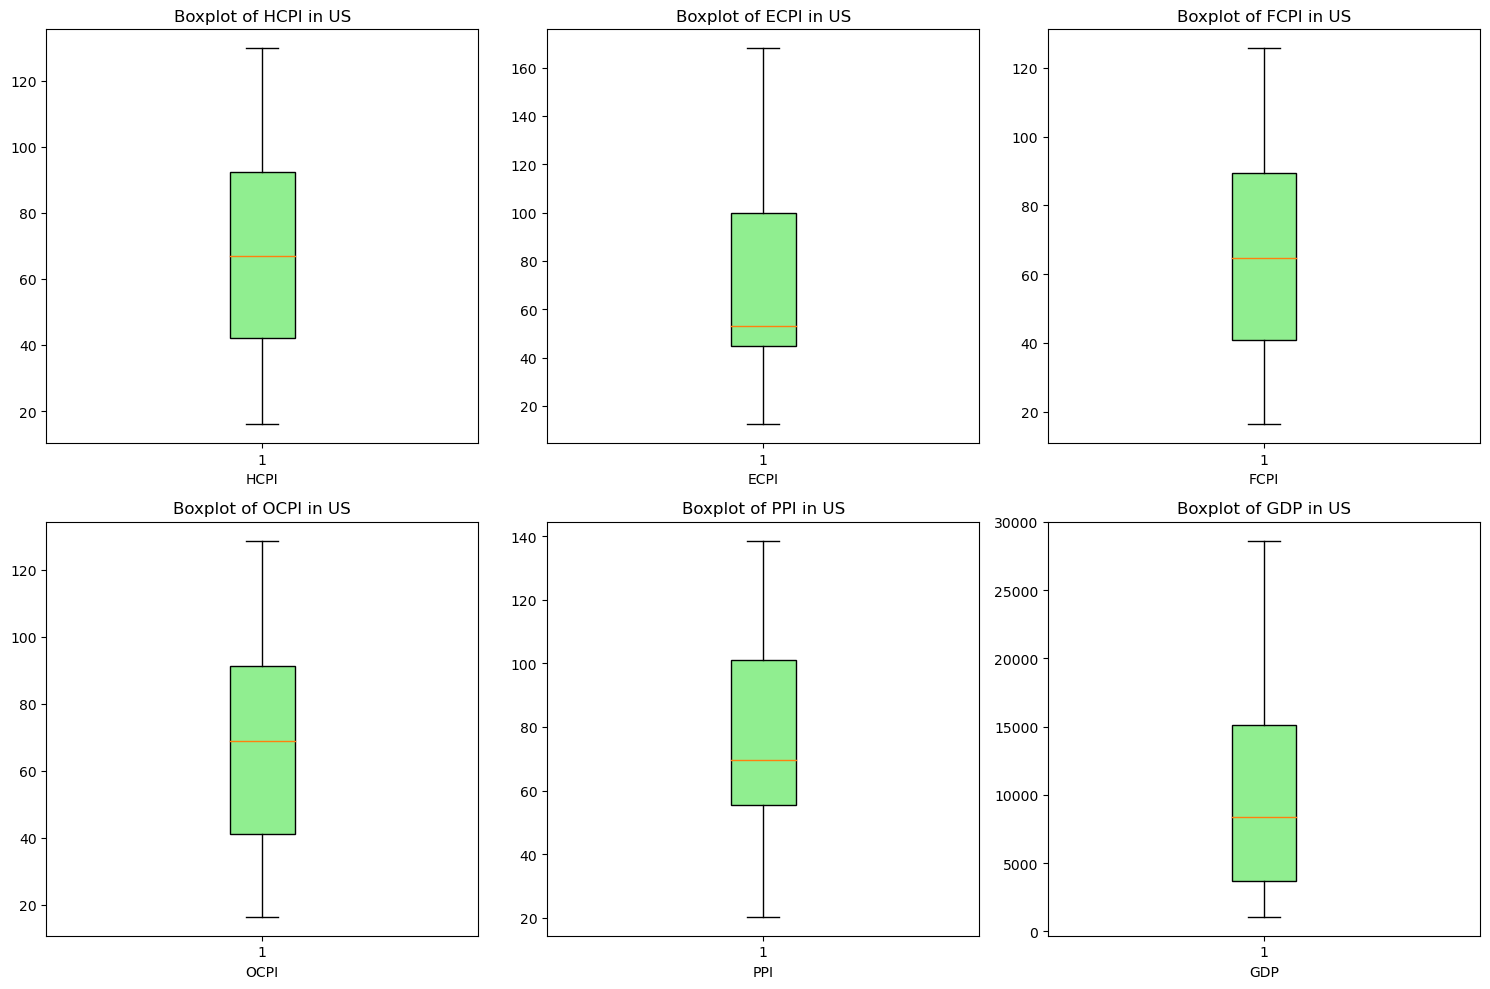

In [43]:
# Boxplots for numeric features to identify outliers

# Define the number of columns for the subplots
num_columns = 3  # Adjust as needed
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5)) 

# Ensure axes is treated as a flat array for easy iteration
axes = axes.flatten()

# Plot each boxplot in its respective subplot
for idx, col in enumerate(numeric_columns):
    box = axes[idx].boxplot(df2[col].dropna(), patch_artist=True)  # plot the boxplot, handle NaN if any
    
    # Set color of the box
    for patch in box['boxes']:
        patch.set_facecolor('lightgreen')  # Apply the color to box
    
    axes[idx].set_title(f'Boxplot of {col} in US')
    axes[idx].set_xlabel(col)

    
# Remove any unused subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

 

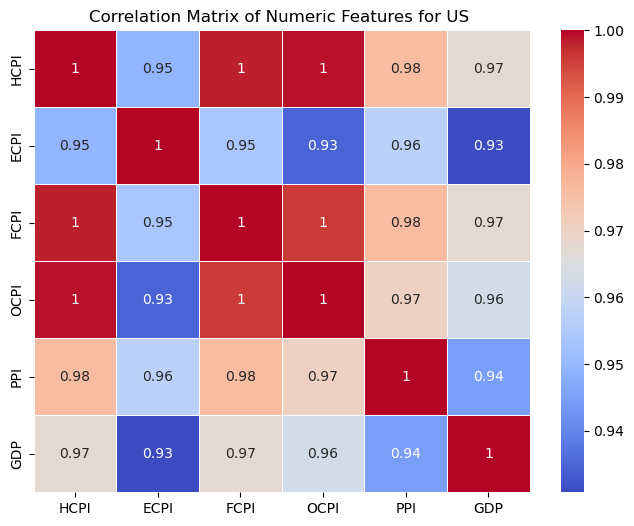

In [45]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df2[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features for US ')
plt.show()






/Users/zozo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zozo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/zozo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zozo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like

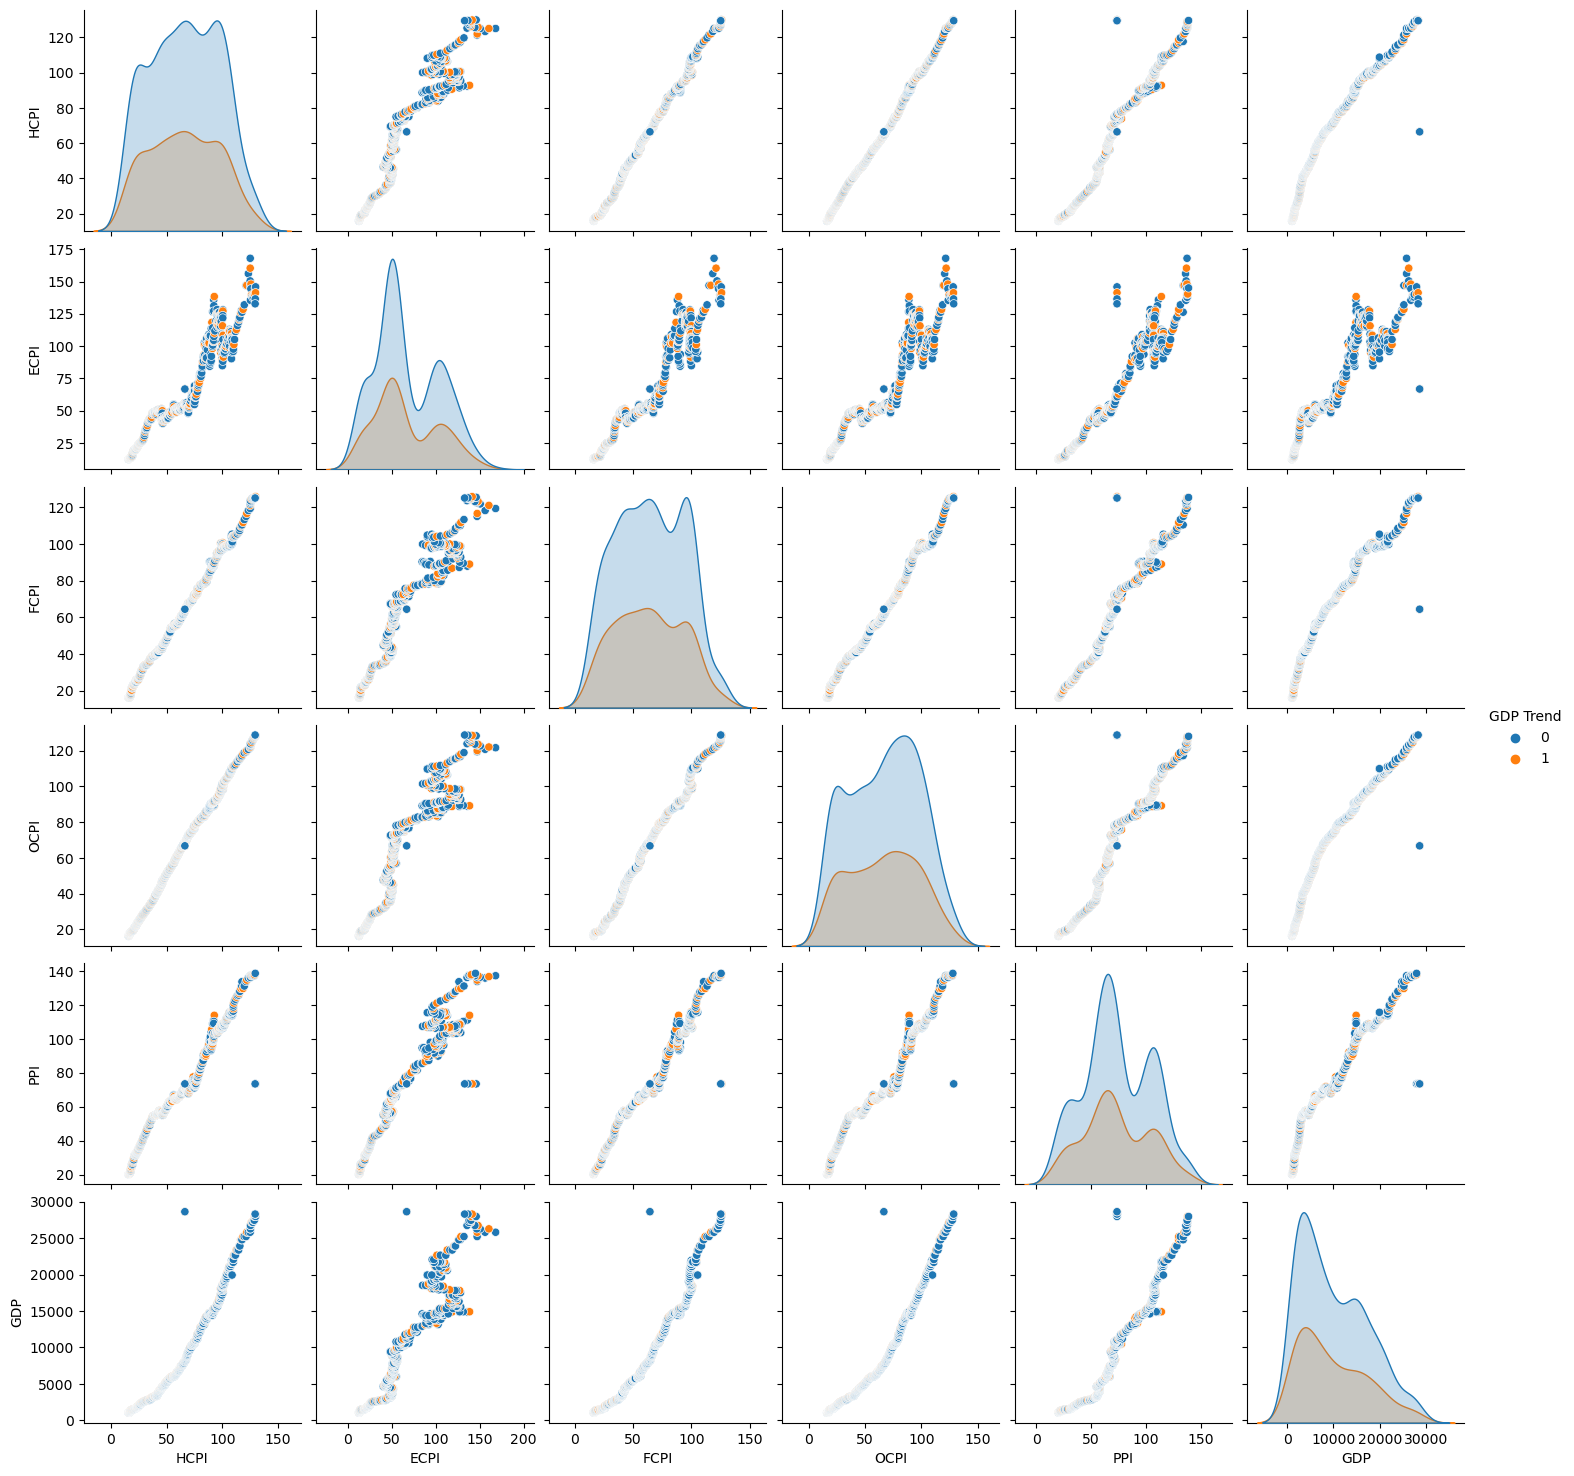

In [47]:
# Pairplot for selected numeric features to observe their relationship
sns.pairplot(df2, hue='GDP Trend')
plt.show()




### Observations and Conclusions:
#### Histograms:
• Most of the variables are skewed right, indicating that their values tend to be lower overall with some higher outliers.
• The distribution patterns suggest that data normalization or transformation might be needed before using these variables in a machine learning model.
#### Boxplots :
• There are no extreme outliers shown in the boxplots, but there is a noticeable range of variability, with GDP having the widest range.
• Most variables exhibit moderate to high dispersion, indicating variability in the dataset.
#### Correlation Matrix:
• There is a very high positive correlation between several features, such as:
 o HCPI and FCPI (correlation = 1)
 o OCPI and FCPI (correlation ≈ 1)
 o PPI and HCPI (correlation ≈ 0.98)
 o GDP also shows strong correlations with other variables like HCPI (0.97), suggesting that many of these variables could be good predictors of GDP but may suffer from multicollinearity.
#### Pair Plot :
• There is a strong linear relationship between many of the variables (e.g., HCPI vs. FCPI, OCPI vs. GDP), suggesting that these features might be highly correlated.
• Some of the points are tightly clustered along linear paths, indicating multicollinearity (high correlation) between features.
• The different colors representing the GDP Trend (0 and 1) show overlapping distributions, suggesting that the features might not fully distinguish between the two trends.

### Key Conclusions:
1. Multicollinearity Issue: The high correlations among several features (e.g., HCPI, FCPI, OCPI) suggest that multicollinearity is present, which can impact the performance and interpretability of models like linear regression. Dimensionality reduction techniques such as PCA or feature selection could be useful.
2. Feature Importance: Given the strong correlation between GDP and features like HCPI, FCPI, and PPI, these variables are likely to be important predictors in a GDP-related model.
3. Data Transformation: Since many of the features show skewness, data normalization or transformation might be necessary to improve model performance.


## 4. Data Preprocessing

In [49]:
# Split data into features and target
df2.fillna(df2.mean(), inplace=True)
X = df2.drop('GDP Trend', axis=1)
y = df2['GDP Trend']

# Verify the target varible
print(y.value_counts())
print(y.dtypes)
X

GDP Trend
0    443
1    207
Name: count, dtype: int64
int64


,HCPI,ECPI,FCPI,OCPI,PPI,GDP
197001,15.948220,12.370930,16.300000,16.346980,20.229711,1051.200
197002,16.032610,12.370930,16.400000,16.429550,20.303745,1051.200
197003,16.116990,12.321640,16.400000,16.553390,20.340762,1051.200
197004,16.243560,12.568080,16.400000,16.635950,20.359270,1067.375
197005,16.285750,12.568080,16.500000,16.718510,20.359270,1067.375
...,...,...,...,...,...,...
202310,129.809700,141.331200,125.761000,128.538500,73.522344,28296.967
202311,129.548100,136.538100,125.096200,128.631800,73.522344,28296.967
202312,129.419400,132.765700,125.012200,128.756000,73.522344,28296.967
202401,66.442211,66.750706,64.451669,66.767013,73.522344,28624.069


In [51]:
# Handling class imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 5. Model Training and Evaluation

In [53]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Train each model and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_prob': y_prob
       
    }

    # Print classification report
    print(f'Classification Report for {name}:')
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       137
           1       0.51      0.61      0.55       129

    accuracy                           0.52       266
   macro avg       0.53      0.53      0.52       266
weighted avg       0.53      0.52      0.52       266

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48       137
           1       0.48      0.55      0.51       129

    accuracy                           0.50       266
   macro avg       0.50      0.50      0.50       266
weighted avg       0.50      0.50      0.49       266

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       137
           1       0.44      0.49      0.46       129

    accuracy                           0.45       266

No Model Stands Out: None of the models provide a satisfactory classification performance. The highest accuracy is only 52%(Logistic Regression), which is barely better than random guessing.
Possible Data Issues: The low performance across all models suggests that the features might not be informative or discriminative enough for this classification task. There could be issues like:
Poor feature selection or lack of relevant features.
High noise or overlapping data between classes.
Need for Further Analysis: Before trying more complex models, consider:
Performing feature engineering or dimensionality reduction.
Addressing potential data imbalances if one class is underrepresented.
Testing alternative feature sets or incorporating more relevant economic indicators.

## 6. Confusion Matrix Visualization

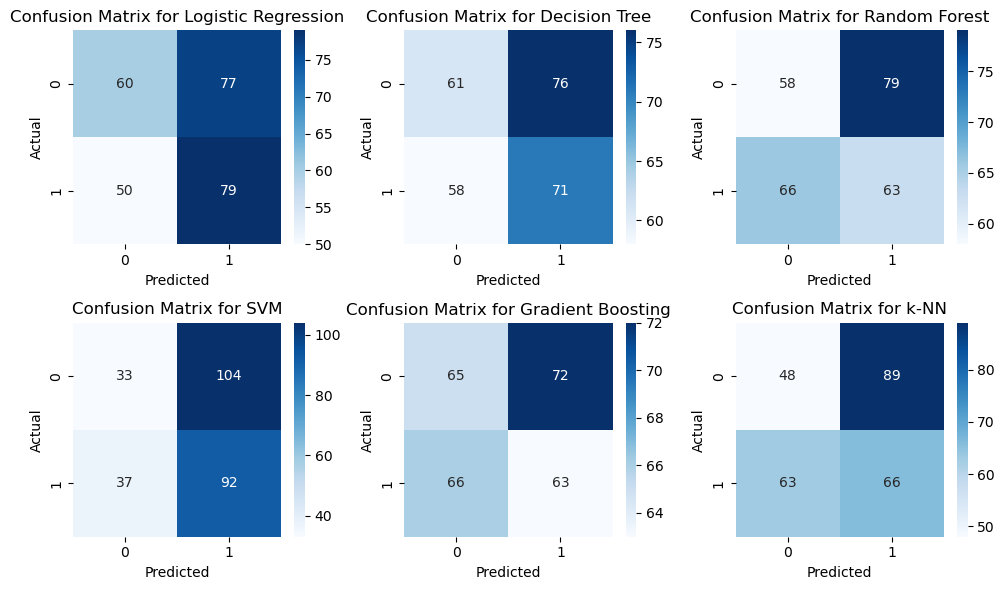

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set up a 3x2 grid for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over the results and plot each confusion matrix
for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix for {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


## 7. ROC Curve and AUC Curve

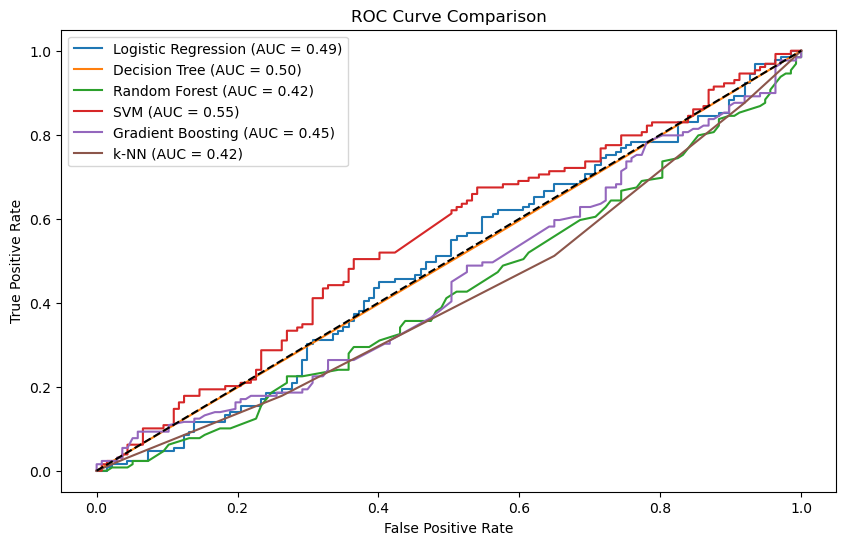

In [60]:
plt.figure(figsize=(10, 6))

for name, result in results.items():
    if result['y_prob'] is not None:  # Check if the model provides probability predictions
        fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
        auc_score = roc_auc_score(y_test, result['y_prob'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


### Poor Model Performance: 
All models exhibit weak discriminatory power, as evidenced by their AUC values, which hover around 0.5. This suggests that the models are not effectively capturing the underlying patterns in the data to make accurate predictions.
### SVM Performs Slightly Better: 
Although the SVM model has the highest AUC (0.55), this is still not a strong performance and indicates only marginal improvement over random guessing.

## 8. Accuracy Comparison Bar Plot

/Users/zozo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


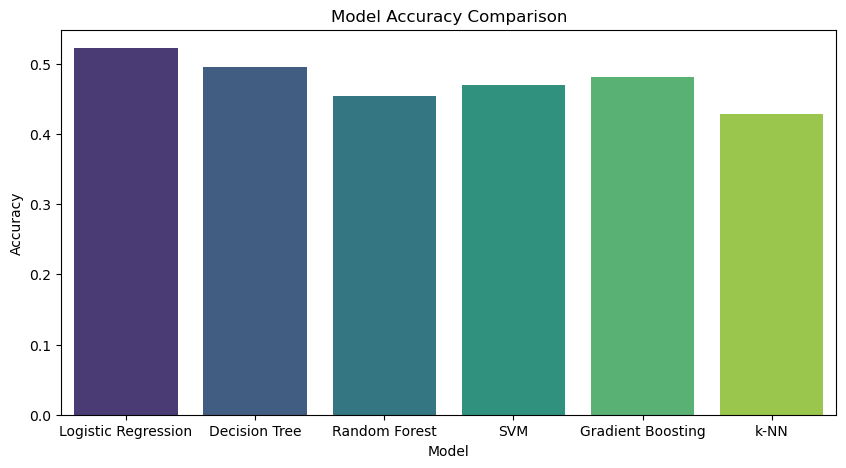

In [62]:
accuracies = {name: result['accuracy'] for name, result in results.items()}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


## 9. Time Series

In [64]:
# Replace NaN values with the mean of each column
df2 = df2.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
print(df2.index)


Index(['197001', '197002', '197003', '197004', '197005', '197006', '197007',
       '197008', '197009', '197010',
       ...
       '202305', '202306', '202307', '202308', '202309', '202310', '202311',
       '202312', '202401', '202402'],
      dtype='object', length=650)


In [66]:
# Using ARIMA for time Series
from statsmodels.tsa.arima.model import ARIMA

# Convert the index to datetime using the correct format '%Y%m'
df2.index = pd.to_datetime(df2.index, format='%Y%m')



# Fit an ARIMA model on the GDP data
model = ARIMA(df2['GDP'], order=(5, 1, 0))  # order=(p,d,q), adjust as needed
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast future values
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 years
print("Forecasted GDP values for the next 10 years:")
print(forecast)




                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  650
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4115.659
Date:                Tue, 01 Oct 2024   AIC                           8243.318
Time:                        14:02:05   BIC                           8270.171
Sample:                    01-01-1970   HQIC                          8253.734
                         - 02-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       8.564e-06    549.227   1.56e-08      1.000   -1076.465    1076.465
ar.L2       1.216e-05    373.169   3.26e-08      1.000    -731.398     731.398
ar.L3          0.3121      0.007     42.745      0.0

/Users/zozo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zozo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/zozo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/var/folders/k_/ccb0tlcj5z579n5gj8v4kh5m0000gn/T/ipykernel_19024/752409644.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=actual_data.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')


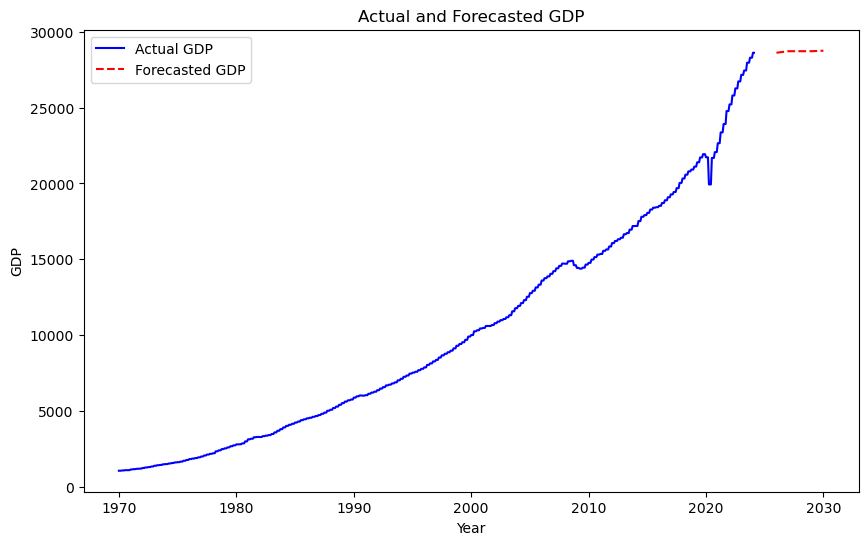

In [68]:
# Ploting Actual and Forecasted GDP

import matplotlib.pyplot as plt
# Extract the actual data and the forecast
actual_data = df2['GDP']
forecast = model_fit.forecast(steps=5)  # Forecasting the next 5 years

# Create a new index for forecasted values (continuing from the last year in the actual data)
forecast_years = pd.date_range(start=actual_data.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')

# Plot the actual and forecasted GDP data
plt.figure(figsize=(10, 6))
plt.plot(actual_data.index, actual_data, label='Actual GDP', color='blue')
plt.plot(forecast_years, forecast, label='Forecasted GDP', color='red', linestyle='--')

# Add title and labels
plt.title('Actual and Forecasted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

# Display the plot
plt.show()


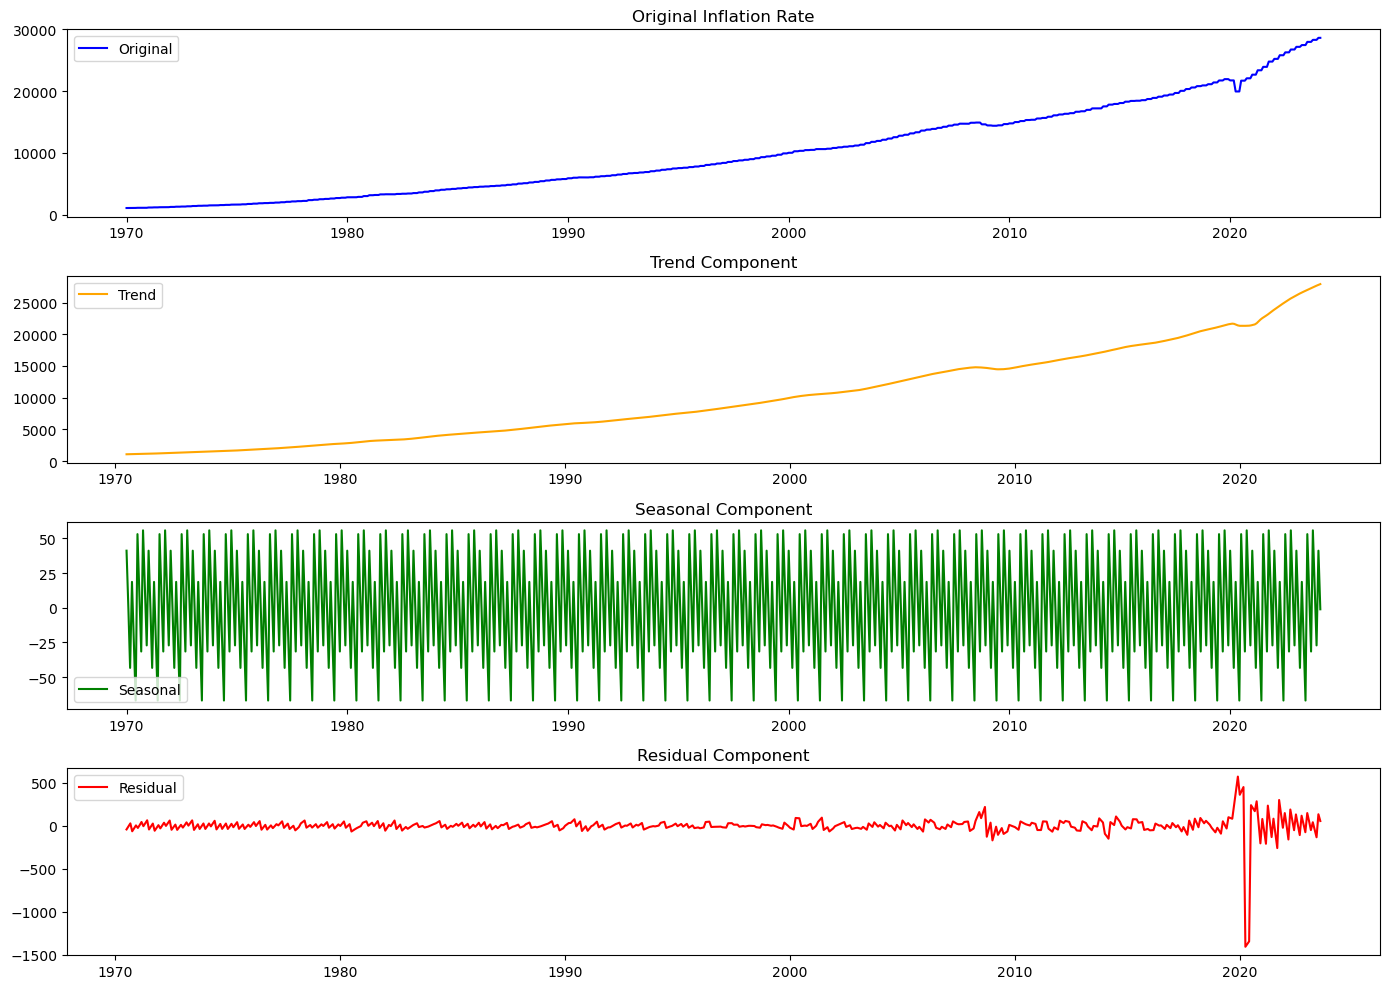

In [70]:
#Time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose


# Perform time series decomposition on the complete US headline inflation data
decomposition = seasonal_decompose(df2['GDP'], model='additive', period=12)

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the original data, trend, seasonality, and residual components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df2['GDP'], label='Original', color='blue')
plt.title('Original Inflation Rate')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


Long-Term Inflation Growth: The trend confirms that inflation has been steadily growing over the decades, with some acceleration in recent years.
Impact of Economic Events: The slight dip or flattening around 2008–2010 is likely due to the financial crisis, reflecting how major economic events can impact inflation rates.
Post-2010 Acceleration: The recent years have seen a sharper increase, which might align with more recent economic factors, such as pandemic-related impacts, government stimulus, or supply chain disruptions.
The GDP exhibits a strong and consistent seasonal pattern
The residual component shows that GDP had relatively stable and predictable behavior up until the late 2000s. However, from around 2008 onward, and especially in 2020, significant external shocks affected the economy, leading to large fluctuations that were not predictable by usual seasonal or trend patterns. These residuals indicate the impact of extraordinary events such as financial crises and the COVID-19 pandemic on GDP.
